<a href="https://colab.research.google.com/github/JayantMalusare/1.Project/blob/main/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
import os
os.environ['KAGGLE_API_TOKEN']="KGAT_d2a910b268e5b558ad89439cb523cff8"

In [ ]:
!kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.12/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 434, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"jayantmalusare","key":"c2723d51d885c30c1c01aa1ea64ad44d"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                             title                                                   size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
saidaminsaidaxmadov/chocolate-sales                             Chocolate Sales                                       468320  2026-01-04 14:23:35.490000          16370        294  1.0              
aliiihussain/amazon-sales-dataset                               Amazon_Sales_Dataset                                 1297759  2026-02-01 11:37:12.353000           3047         57  1.0              
hassanjameelahmed/price-of-healthy-diet-clean                   Global Healthy Diet Cost Analysis (2017–2024)          14103  2026-02-05 07:18:40.347000            497         22  1.0              
ibrahimsha

In [ ]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database

Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
License(s): CC0-1.0
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 44.8MB/s]


In [ ]:
!unzip pima-indians-diabetes-database.zip

Archive:  pima-indians-diabetes-database.zip
  inflating: diabetes.csv            


In [ ]:
!ls

 diabetes.csv	   'kaggle (2).json'			 sample_data
'kaggle (1).json'   pima-indians-diabetes-database.zip


Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7027 - loss: 0.6502 - val_accuracy: 0.6494 - val_loss: 0.6152
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7350 - loss: 0.5623 - val_accuracy: 0.7013 - val_loss: 0.5669
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7721 - loss: 0.4699 - val_accuracy: 0.7662 - val_loss: 0.5515
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7842 - loss: 0.4836 - val_accuracy: 0.7532 - val_loss: 0.5425
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7701 - loss: 0.4628 - val_accuracy: 0.7662 - val_loss: 0.5329
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7805 - loss: 0.4445 - val_accuracy: 0.7662 - val_loss: 0.5328
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7840 - loss: 0.4255 - val_accuracy: 0.7662 - val_loss: 0.5290
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7864 - loss: 0.4500 - val_accuracy: 0.7662 - val_loss:

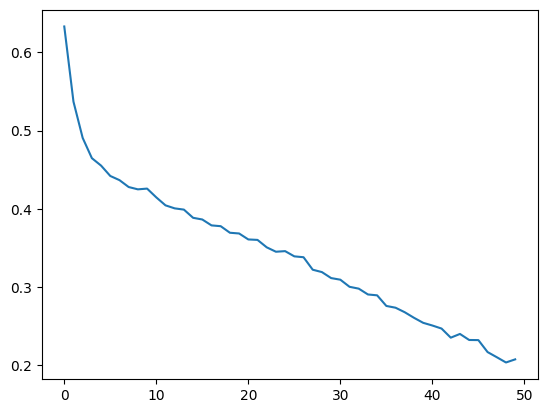

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df=pd.read_csv("diabetes.csv")
x=df.iloc[:,0:8]
y=df["Outcome"]
obj=StandardScaler()
x_=obj.fit_transform(x)
Xtrain,Xtest,Ytrain,Ytest=train_test_split(x_,y,test_size=0.1)
model=models.Sequential()
model.add(layers.Dense(100,activation="relu"))
#model.add(layers.Dense(75,activation="relu"))
model.add(layers.Dense(50,activation="relu"))
#model.add(layers.Dense(25,activation="relu"))
model.add(layers.Dense(12,activation="relu"))
model.add(layers.Dense(8,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"]
,)
history=model.fit(Xtrain,Ytrain,epochs=50, validation_data=(Xtest,Ytest))
result=model.evaluate(Xtest,Ytest)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')

3/3 - 0s - 10ms/step - accuracy: 0.7273 - loss: 0.8351


/tmp/ipython-input-3774546462.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower right')


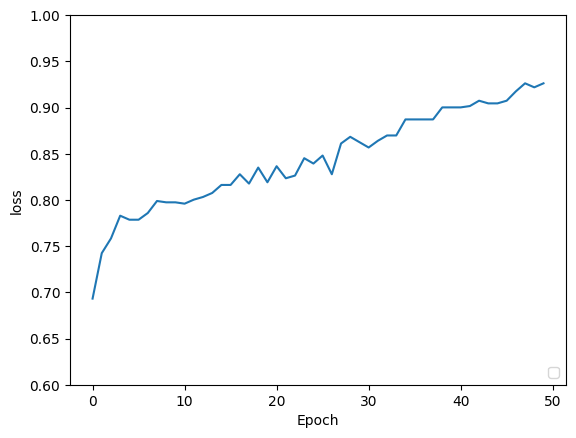

In [ ]:
#plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, 0.8])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(Xtest, Ytest, verbose=2)
plt.ylim([0.6,1])
plt.plot(history.history['accuracy'], label = 'accuracy')